#Import Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


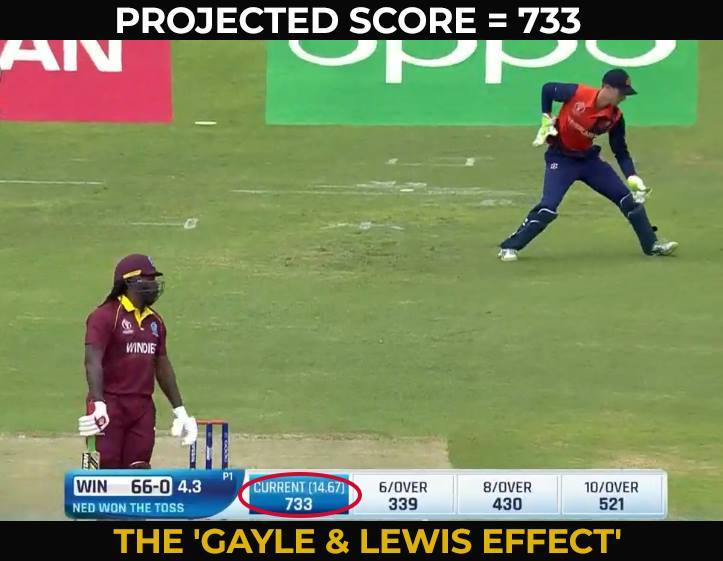

The above picture clearly tells you how bad is taking run rate as a single factor to predict the final score in an limited overs cricket match.  In ODI and T-20 cricket, many factors play a key role in deciding what the final score will be.  Let’s look at some of the key factors:

* Number of wickets left
* Number of balls left
* On how much scores are the current batsman batting?
* How much the team had scored in last 5 overs?
* How much the team had lost wickets in last 5 overs?
* The nature of the pitch
* How strong is the batting and bowling team?

I will use some of these factors to predict score using machine learning algorithms. We use regression analysis in machine learning to predict the final score of an ODI or T-20 match.

## Preparing the dataset
I have not scrapped the web pages to prepare the dataset. I have downloaded the dataset from [cricsheet](https://cricsheet.org/downloads/). The site gives us ball by ball details of matches. I then wrote a custom code to only include some of the features which I will be using.

The dataset contains ball by ball coverage of:

* 1188 ODI matches: [odi.csv](https://github.com/ParthPathak27/Cricket-Score-Predictor/blob/main/odi.csv)
* 1474 T-20 matches: [t20.csv](https://github.com/ParthPathak27/Cricket-Score-Predictor/blob/main/t20.csv)
* 617 IPL matches: [ipl.csv](https://github.com/ParthPathak27/Cricket-Score-Predictor/blob/main/ipl.csv)

Each dataset consists of following columns(features):

* mid: Each match is given a unique number
* date: When the match happened
* venue: Stadium where match is being played
* bat_team: Batting team name
* bowl_team: Bowling team name
* batsman: Batsman name who faced that ball
* bowler: Bowler who bowled that ball
* runs: Total runs scored by team at that instance
* wickets: Total wickets fallen at that instance
* overs: Total overs bowled at that instance
* runs_last_5: Total runs scored in last 5 overs
* wickets_last_5: Total wickets that fell in last 5 overs
* striker: max(runs scored by striker, runs scored by non-striker)
* non-striker: min(runs scored by striker, runs scored by non-striker)
* total: Total runs scored by batting team after first innings

## Importing the dataset

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import accuracy_score

DataFrame.iat
Fast integer location scalar accessor.

DataFrame.loc
Purely label-location based indexer for selection by label.

Series.iloc
Purely integer-location based indexing for selection by position.

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Cricket-prediction/t20.csv')
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

I have used ‘ipl.csv’ datafile here for predicting scores in ODI cricket. One can use ‘t20.csv’ or ‘odi.csv’ if they want to predict scores of T-20 matches or IPL matches respectively.

In [4]:
X

array([[0.00e+00, 0.00e+00, 1.00e-01, 0.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 2.00e-01, 1.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 3.00e-01, 1.00e+00, 0.00e+00],
       ...,
       [1.07e+02, 4.00e+00, 1.41e+01, 5.00e+00, 0.00e+00],
       [1.08e+02, 4.00e+00, 1.42e+01, 5.00e+00, 1.00e+00],
       [1.12e+02, 4.00e+00, 1.43e+01, 9.00e+00, 1.00e+00]])

In [5]:
y

array([179, 179, 179, ..., 165, 165, 165])

#checking corelation

Now use Pandas dataset.corr() function to find the correlation among the columns. We are only having four numeric columns in the Dataframe. The output Dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. As mentioned earlier, the correlation of a variable with itself is 1. For that reason, all the diagonal values are 1.00   

dataset.corr(method ='pearson')

Use Pandas dataset.corr() function to find the correlation among the columns in the Dataframe using ‘kendall’ method. The output Dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell. As mentioned earlier, the correlation of a variable with itself is 1. For that reason, all the diagonal values are 1.00.

dataset.corr(method='kendall')

<ipython-input-6-0bfb1f07e640>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataset.corr(method ='pearson')


<module 'matplotlib' from '/usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py'>

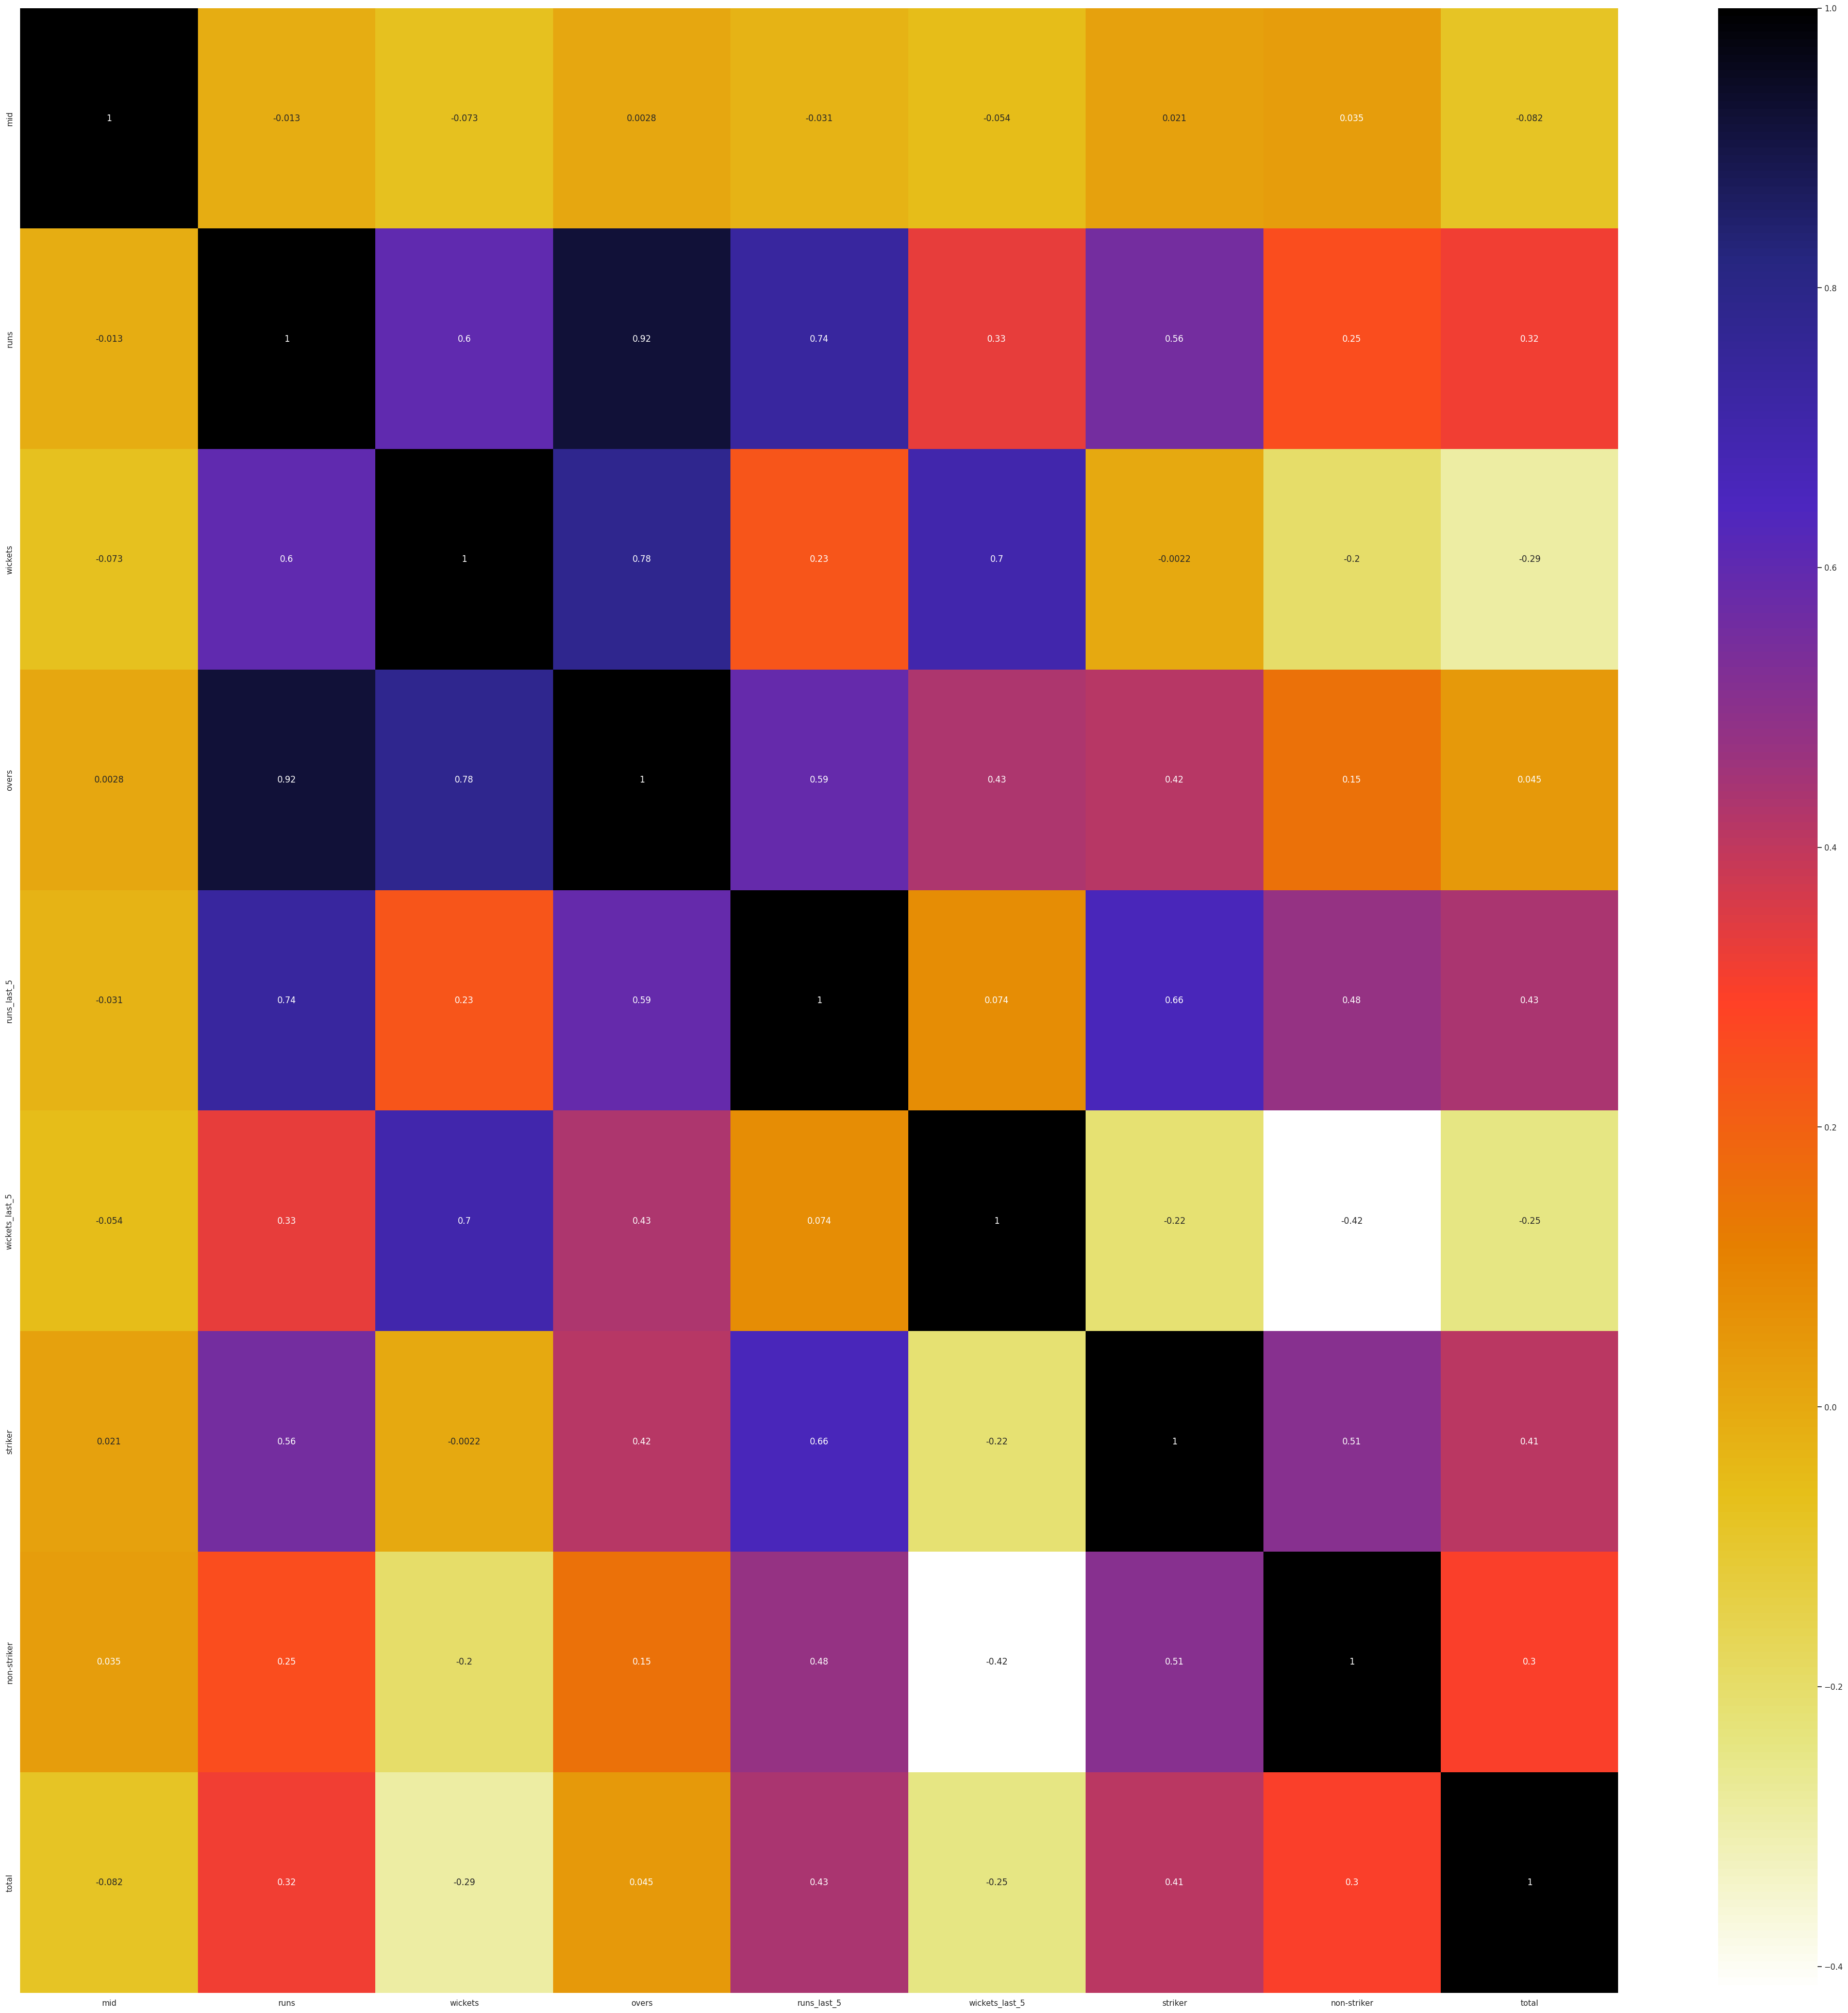

In [6]:
import seaborn as sns
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
sns.set(rc = {'figure.figsize':(50,50)})
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt

# separate dataset into train and test

**Features Used:**

* runs
* wickets
* overs
* striker
* non-striker

**Why didn’t I use other features?**

While experimenting, all the other features didn’t make much difference in results. You can use a different combination of features and test the code on them.

**Label Used**: total

## Splitting data into training and testing set


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape

((14975, 5), (4992, 5))

We will train our model on 75 percent of the dataset and test the model on remaining dataset.

## Feature Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

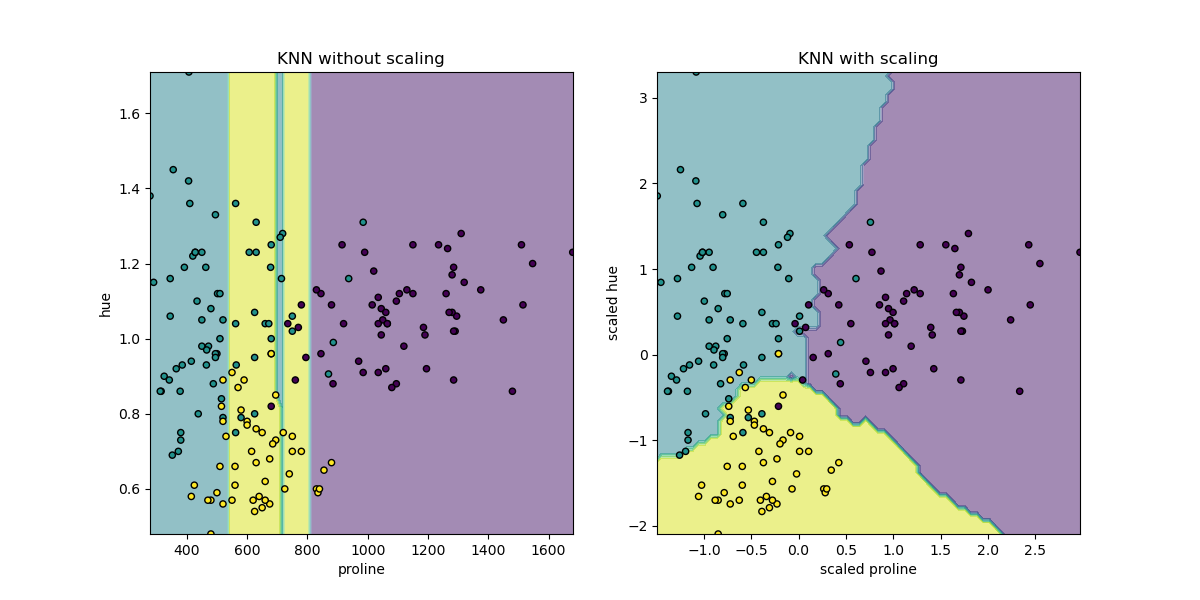

Feature scaling is a very important part of machine learning. You can read more about it [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

## Training the dataset
* Using Linear Regression Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

* Using Random Forest Regression Algorithm

In [11]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators=100,max_features=None)
ran.fit(X_train,y_train)

RandomForestRegressor(max_features=None)



*   using logistic Regression Algorithm



In [12]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()



*   Prediction through Decision Tree



In [13]:
from sklearn.tree import DecisionTreeClassifier
Decision = DecisionTreeClassifier()
Decision.fit(X_test,y_test)

DecisionTreeClassifier()



*   Prediction through Random Forest Classifier



In [14]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier(n_estimators=20)
Random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)



*  Prediction through SVM



In [15]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

You can use any one of these algorithms but as you will see later random forest regression gives us better accuracy.

## Testing the dataset on trained model

**R-squared value**

R-sqaured is a statistic that will give some information about the goodness of fit of a model. In regression, the R-squared coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R-squared value of 1 indicates that the regression predictions perfectly fit the data.

Custom accuracy

I have defined my own function to measure accuracy of model. Custom Accuracy is defined on the basis of difference between the predicted score and actual score. If this difference falls below a particular thresold, we count it as a correct prediction.


In [17]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

I have kept thresold as 20 for ODI matches and 10 for T-20 matches.
default ml algorithms threshold is 0.5



*   Using Linear Regression Algorithm



In [19]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: 0.024692938955906962
Custom accuracy: 39.84375





*  Using Random Forest Regression Algorithm





In [20]:
y_pred = ran.predict(X_test)
score = ran.score(X_test,y_test)
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: -0.0851194150761394
Custom accuracy: 39.82371794871795




*   using logistic Regression Algorithm



In [21]:
y_pred = Logistic.predict(X_test)
score = Logistic.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: 1.7628205128205128
Custom accuracy: 30.188301282051285






* Prediction through Decision Tree





In [22]:
y_pred = Decision.predict(X_test)
score = Decision.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: 2.1434294871794872
Custom accuracy: 35.296474358974365




*  Prediction through Random Forest Classifier



In [23]:
y_pred = Random.predict(X_test)
score = Random.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: 2.1033653846153846
Custom accuracy: 40.42467948717949




* Prediction through SVM



In [24]:
y_pred = svm.predict(X_test)
score = svm.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R-squared value: 12.139423076923077
Custom accuracy: 66.24599358974359


## Testing with a custom input



* Using Linear Regression Algorithm



In [25]:
import numpy as np
new_prediction = lin.predict(sc.transform(np.array([[130,3,10,40,30]])))
print("Prediction score:" , new_prediction)

Prediction score: [215.87180091]




* Using Random Forest Regression Algorithm



In [26]:
import numpy as np
new_prediction = ran.predict(sc.transform(np.array([[130,3,10,40,30]])))
print("Prediction score:" , new_prediction)

Prediction score: [221.23]






* using logistic Regression Algorithm





In [27]:
import numpy as np
new_prediction = Logistic.predict(sc.transform(np.array([[130,3,10,40,30]])))
print("Prediction score:" , new_prediction)

Prediction score: [208]




* Prediction through Decision Tree



In [28]:
import numpy as np
new_prediction = Decision.predict(sc.transform(np.array([[130,3,10,40,30]])))
print("Prediction score:" , new_prediction)

Prediction score: [181]




*  Prediction through Random Forest Classifier



In [29]:
import numpy as np
new_prediction = Random.predict(sc.transform(np.array([[130,3,10,40,30]])))
print("Prediction score:" , new_prediction)

Prediction score: [240]




*  Prediction through SVM



In [30]:
import numpy as np
new_prediction = svm.predict(sc.transform(np.array([[130,3,10,40,30]])))
print("Prediction score:" , new_prediction)

Prediction score: [203]


#Random prediction


In [ ]:
import random
team1 = input("Enter the First team: ")
team2 = input("Enter the second team: ")

team_playing = input("Who is doing batting: ")
if team_playing.upper() == team1.upper() or team_playing.upper() == team2.upper():
    pass
else:
    print("You written the team that is not playing")
    quit()

is_match_started = input("Is Match Started[Y/N]: ")
is_match_started = is_match_started.upper()

while True:
    if is_match_started.upper() == 'Y' or is_match_started.upper() == 'N':
        break
    print("Wrong Input Please Try Again")
    is_match_started = input("Is Match Started[Y/N]: ")
    is_match_started = is_match_started.upper()

if is_match_started == 'Y':
    overs = int(
        input("Please tell how many overs completed(only over not balls): "))
    if overs >= 20:
        print("I think you late")
        quit()
    runs = int(input("Please tell how many run are(according to full over): "))
    wickets = int(input("Please tell how many wickets are taken: "))
    if wickets >= 10:
        print(f"10 wickets are over {team_playing} made {runs} runs")
        quit()
    if wickets < 0:
        print("What a joke")
        quit()
    rr = runs / overs
    print(f"Hmm.... Run rate at this time is {rr}")
    low_or_sum_rpo = [1, 0.5, 0.1, 0.8, 0.45, 0.68]
    neg_or_pos = random.randint(0, 1)
    rpo_changer = random.randint(0, len(low_or_sum_rpo))
    rpo_changer = low_or_sum_rpo[rpo_changer]
    if neg_or_pos == 0:
        rr - rpo_changer
    elif neg_or_pos == 1:
        rr + rpo_changer

    if overs <= 0:
        print("Please tell after 1 over")
    else:
        if wickets <= 3:
            if (overs < 9 and rr > 9) or (overs >= 9):
                predict = int(rr * 20)
                print(
                    f"I think they will make between {predict - 3} - {predict + 3}")
            else:
                print(f"{team_playing} are slow but may beat after some overs: ")
                sum_rpo = [1, 2, 0.5, 0.8, -0.1, -0.3]
                rpo_changer = random.randint(0, len(sum_rpo))
                rpo_changer = sum_rpo[rpo_changer]
                rr += rpo_changer
                predict = int(rr * 20)
                print(
                    f"I think they can make between {predict - 3} - {predict + 3}")
        elif wickets > 3 and wickets <= 7:
            to_minus = random.randint(9, 24)
            if (overs < 9 and rr > 9) or (overs >= 9):
                predict = int(rr * 20) - to_minus
                print(
                    f"I think they will make between {predict - 3} - {predict + 3}")
            else:
                print(f"{team_playing} are slow but may beat after some overs: ")
                sum_rpo = [1, 2, 0.5, 0.8, -0.1, -0.3]
                rpo_changer = random.randint(0, len(sum_rpo))
                rpo_changer = sum_rpo[rpo_changer]
                rr += rpo_changer
                predict = int(rr * 20) - to_minus
                print(
                    f"I think they can make between {predict - 3} - {predict + 3}")
        elif wickets > 7:
            to_minus = random.randint(18, 40)
            if (overs < 9 and rr > 9) or (overs >= 9):
                predict = int(rr * 20) - to_minus
                print(
                    f"I think they will make between {predict - 3} - {predict + 3}")
            else:
                print(f"{team_playing} are slow but may beat after some overs: ")
                sum_rpo = [1, 2, 0.5, 0.8, -0.1, -0.3]
                rpo_changer = random.randint(0, len(sum_rpo))
                rpo_changer = sum_rpo[rpo_changer]
                rr += rpo_changer
                predict = int(rr * 20) - to_minus
                print(
                    f"I think they can make between {predict - 3} - {predict + 3}")
elif is_match_started == 'N':
    print("Please come after started match")
